In [1]:
import numpy as np
import matplotlib.pylab as plt

Text(0.5,1,'Examples of Free Energy Landscapes')

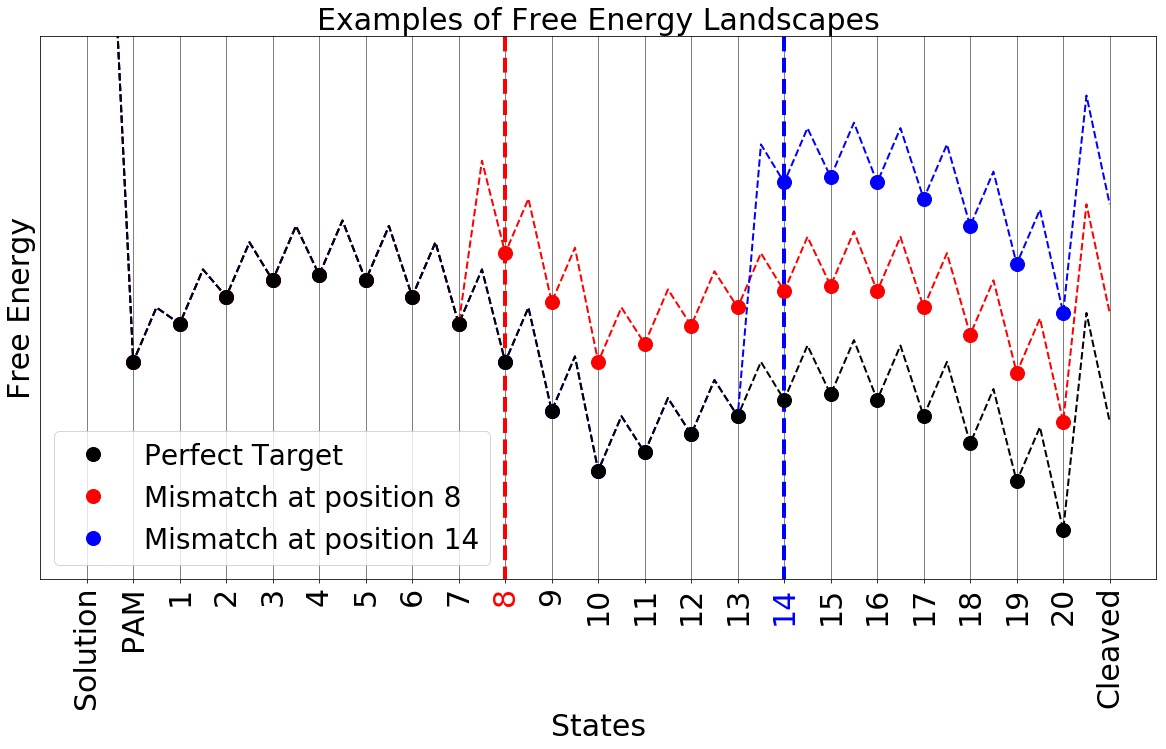

In [143]:
#energies = np.array([20.,1., 4., 6.3, 7.7, 8.2, 8.2, 7.6, 6.5, 4.7,3.4,1.6,0.,0.,3.2,4.,3.6,2.6,1.6,0.6,-0.6,-5.])
#energies = np.array([20.,10.,9.,8.,7.,6.,5.,4.,3.,2.,1.,0.,-1.,-2.,-3.,-4.,-5.,-6.,-7.,-8.,-9.,-10.,])
energies = np.ones(22)
energies[0] = 20.

#for i in range(1,22):
#    energies[i] = (100.-1./energies[i]*(float(i)-5)**(2))/100.

for i in range(1,12):
    energies[i] = (36.-(float(i)-5.)**2)/10.
    
for i in range(14,22):
    energies[i] = (14.-(float(i)-16.)**2)/10.
    
energies[12] = (2*energies[11]+energies[14])/3.
energies[13] = (energies[11]+2*energies[14])/3.

energies2 = energies.copy()
energies2[9:] = 2.+energies2[9:]
energies3 = energies.copy()
energies3[15:] = 4.+energies3[15:]


plt.figure(figsize=[20,10])

trans = []
trans2 = []
trans3 = []
trans.append(11.)
trans2.append(11.)
trans3.append(11.)
height = 1.0
for i in range(len(energies)-1):
    trans.append(energies[i+1])
    trans.append(energies[i+1]+height)
    trans2.append(energies2[i+1])
    trans2.append(energies2[i+1]+height)
    trans3.append(energies3[i+1])
    trans3.append(energies3[i+1]+height)

trans2[16] = 2.+trans2[16]
trans3[28] = 4.+trans3[28]
    
trans[-1] = 4*height+trans[-2]
trans2[-1] = 4*height+trans2[-2]
trans3[-1] = 4*height+trans3[-2]

trans.append(trans[-1]-2.)
trans2.append(trans2[-1]-2.)
trans3.append(trans3[-1]-2.)

plt.plot(np.arange(.5,22.5,0.5),trans2,linewidth=2.,linestyle='--',color='r')
plt.plot(np.arange(.5,22.5,0.5),trans3,linewidth=2.,linestyle='--',color='b')
plt.plot(np.arange(.5,22.5,0.5),trans,linewidth=2.,linestyle='--',color='k')


plt.axis([-1,23,-2,8])
plot1 = plt.plot(range(0,22),energies3,marker='o',markersize=14,color='b',linewidth=0.,label='Mismatch at position 14')
plot2 = plt.plot(range(0,22),energies2,marker='o',markersize=14,color='r',linewidth=0.,label='Mismatch at position 8')
plot3 = plt.plot(range(0,22),energies,marker='o',markersize=14,color='k',linewidth=0.,label='Perfect Target')
plt.xticks(range(0,23),['Solution','PAM'] + range(1,21) + ['Cleaved'],fontsize=30,rotation='vertical')
plt.gca().get_xticklabels()[9].set_color('r')
plt.gca().get_xticklabels()[15].set_color('b')
plt.yticks([],[])
plt.ylabel('Free Energy',fontsize=30)
plt.xlabel('States',fontsize=30)
plt.vlines(range(0,23),15,-8,color='grey',linewidth=1.);
plt.vlines([9],15,-8,color='r',linewidth=4.,linestyle='--')
plt.vlines([15],15,-8,color='b',linewidth=4.,linestyle='--')
plt.legend(handles=[plot3[0],plot2[0],plot1[0]],fontsize=28)
plt.title('Examples of Free Energy Landscapes',fontsize=30)

